In [ ]:
!pip install yfinance

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 987.6 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import yfinance as yf

In [ ]:
symbol = 'BTC-USD'  # или любой другой тикер
start_date = '2017-08-01'
end_date = '2023-11-24'

df = yf.download(symbol, start=start_date, end=end_date)
df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(mdates.date2num)
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']].values

[*********************100%%**********************]  1 of 1 completed


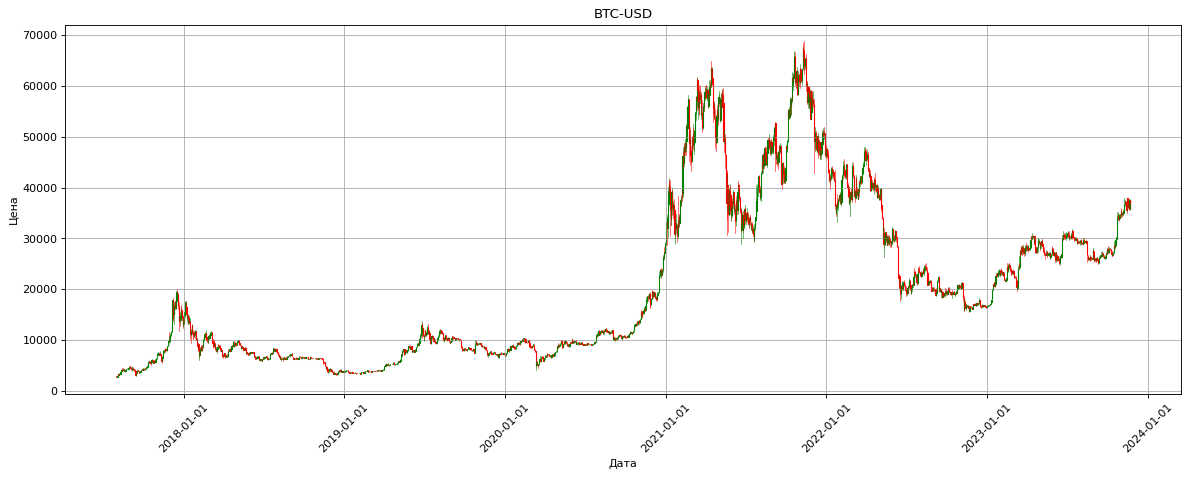

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6), dpi=80)
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

# Форматирование графика
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.title('BTC-USD')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid()

In [ ]:
def calculate_macd(sh_e, l_e, s_e):
    df['short_ewm'] = df['Close'].ewm(span=sh_e, min_periods=sh_e, adjust=False).mean()
    df['long_ewm'] = df['Close'].ewm(span=l_e, min_periods=l_e, adjust=False).mean()
    df['MACD'] = df['short_ewm'] - df['long_ewm']
    df['MACD_S'] = df['MACD'].ewm(span=s_e, min_periods=s_e, adjust=False).mean()
    df['MACD_H'] = df['MACD'] - df['MACD_S']

In [ ]:
calculate_macd(12, 26, 9)

In [ ]:
'''
Простая стратегия торговли с помощью MACD представляет из себя
анализ трендов с помощью визуального анализа совместного поведения
кривой MACD и сигнала MACD.

Будем исходить из того, что при "пробивании" сигналом MACD
кривой MACD снизу индикатор обозначает дальнейшее падение цены актива.
Следовательно, в таком случае мы будем продавать актив.

Аналогично, при пробивании сигналом MACD кривой MACD сверху индикатор
обозначает дальнейшее возрастание цены актива. Следовательно, в таком случае
мы будем покупать актив.
'''

'\nПростая стратегия торговли с помощью MACD представляет из себя\nанализ трендов с помощью визуального анализа совместного поведения\nкривой MACD и сигнала MACD.\n\nБудем исходить из того, что при "пробивании" сигналом MACD\nкривой MACD снизу индикатор обозначает дальнейшее падение цены актива.\nСледовательно, в таком случае мы будем продавать актив.\n\nАналогично, при пробивании сигналом MACD кривой MACD сверху индикатор\nобозначает дальнейшее возрастание цены актива. Следовательно, в таком случае\nмы будем покупать актив.\n'

In [ ]:
'''
Простая стратегия торговли с помощью MACD представляет из себя
анализ трендов с помощью визуального анализа совместного поведения
кривой MACD и сигнала MACD.

Будем исходить из того, что при "пробивании" сигналом MACD
кривой MACD снизу индикатор обозначает дальнейшее падение цены актива.
Следовательно, в таком случае мы будем продавать актив.

Аналогично, при пробивании сигналом MACD кривой MACD сверху индикатор
обозначает дальнейшее возрастание цены актива. Следовательно, в таком случае
мы будем покупать актив.
'''

'''
Для оценки эффективности стратегии воспользуемся имитационным подходом.
На основе опыта реальных трейдеров, моделируется следующая стратегия:
1) Имеется банк, который представляет собой 100% суммы, которой
располагает трейдер
2) Имеется сумма, которую трейдер использует для сделки. Как правило
она составляет часть банка. Для большей объективности, эта сумма будет
фиксированно составлять 5% от банка.

Эффективной будет та стратегия, которая при проведении операций за
обозреваемый период позволит иметь наибольший итоговый размер банка.

Торговля будет начинаться каждый раз с 100 дня наблюдений.
'''

'\nДля оценки эффективности стратегии воспользуемся имитационным подходом.\nНа основе опыта реальных трейдеров, моделируется следующая стратегия:\n1) Имеется банк, который представляет собой 100% суммы, которой \nрасполагает трейдер\n2) Имеется сумма, которую трейдер использует для сделки. Как правило\nона составляет часть банка. Для большей объективности, эта сумма будет \nфиксированно составлять 5% от банка.\n\nЭффективной будет та стратегия, которая при проведении операций за \nобозреваемый период позволит иметь наибольший итоговый размер банка.\n\nТорговля будет начинаться каждый раз с 100 дня наблюдений.\n'

In [ ]:
from itertools import product


def find_best_approach(max_one, max_two, max_three):
    best_result = 1000
    best_set = ()
    res_vault = []
    sets_vault = []
    for i in product(range(1, max_one), range(1, max_two),
                     range(1, max_three)):
        calculate_macd(i[0], i[1], i[2])
        bank = 1000
        bet_coef = 0.05
        pack = 0
        for day, signal in enumerate(df['MACD_H'] > 0):
            # print(df['Close'].iloc[day], signal)
            # print(signal, bank, pack)
            if signal == False:
                if pack == 0:
                    continue
                else:
                    bank += pack * df['Close'].iloc[day]
                    pack = 0
                    continue
            if signal == True:
                if pack == 0:
                    pack += ((bank * bet_coef) / df['Close'].iloc[day])
                    bank -= bank * bet_coef
                    continue
                else:
                    continue
                pass
        bank += pack * df['Close'].iloc[day]
        pack = 0
        res_vault.append(bank)
        sets_vault.append((i[0], i[1], i[2]))
        if bank > best_result:
            best_result = bank
            best_set = (i[0], i[1], i[2])
    print("Лучший результат", best_result)
    print("Лучший набор параметров", best_set)
    return res_vault, sets_vault

In [ ]:
results, sets = find_best_approach(40, 40, 40)

Лучший результат 1287.8999266273122
Лучший набор параметров (12, 14, 23)


In [ ]:
len(results)

59319

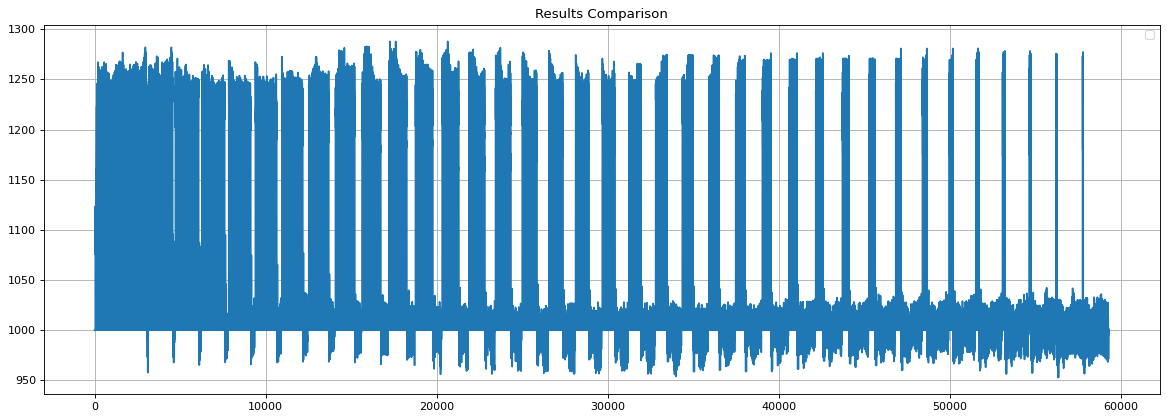

In [ ]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(range(len(results)), results)
plt.title("Results Comparison")
plt.grid()
plt.legend()

In [ ]:
print("Рейтинг наборов гиперпараметров:\n")
pd.Series(results, index=sets).sort_values(ascending=False)[:20]

Рейтинг наборов гиперпараметров:



(14, 23, 12)    1287.899927
(12, 14, 23)    1287.899927
(12, 23, 14)    1287.899927
(11, 18, 19)    1282.842071
(11, 19, 18)    1282.842071
(11, 22, 16)    1282.635089
(11, 16, 22)    1282.635089
(2, 38, 3)      1282.012326
(3, 38, 2)      1282.012326
(16, 24, 10)    1281.593966
(10, 24, 16)    1281.535331
(34, 38, 22)    1280.996697
(33, 39, 22)    1280.883484
(32, 39, 23)    1280.866638
(31, 39, 24)    1280.866638
(12, 16, 20)    1280.474701
(12, 20, 16)    1280.474701
(12, 21, 15)    1279.968256
(12, 15, 21)    1279.968256
(11, 17, 20)    1279.955389
dtype: float64

In [ ]:
print("Результат торговли при наборе параметров (12, 26, 9):")
pd.Series(results, index=sets).iloc[(12 - 1)*39*39 + (26 - 1)*39 + 9 - 1]

Результат торговли при наборе параметров (12, 26, 9):


1242.7325483913944

In [ ]:
1287/1000, 1242/1000

(1.287, 1.242)